In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.offline as pyo
# !pip install quandl
import quandl
import yfinance as yf
import pylab
import seaborn as sns #built on top of matplotlib and is useful in providing useful interface for showing results
from datetime import datetime #for data retrival of MnC's finances
from pandas_datareader import data

pd.options.plotting.backend='plotly'
# pyo.init_notebook_mode(connected='True')

In [2]:
#Setting the begining and endind dates
today=datetime.now()
year_ago=datetime(today.year-1,today.month,today.day) #starting date= one yr prior to current date

In [3]:
TWTR=pd.read_csv("TWTR.csv")
MET=pd.read_csv("MET.csv")
MSFT=pd.read_csv("MSFT.csv")
AMZN=pd.read_csv("AMZN.csv")
EBAY=pd.read_csv("EBAY.csv")
NFLX=pd.read_csv("NFLX.csv")

#SIX companies choosed for data extraction
company_list=['TWTR','MET','MSFT','AMZN','EBAY','NFLX']

In [4]:
TWTR.head(5)
#fIrst five rows of twitter's finance dataset
#To see how it is structured

Date       Open       High        Low      Close  Adj Close  \
0  2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1  2013-11-08  45.930000  46.939999  40.689999  41.650002  41.650002   
2  2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3  2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4  2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

      Volume  
0  117701600  
1   27925300  
2   16113900  
3    6316700  
4    8688300

In [5]:
MET.head(5)

Date       Open       High        Low      Close  Adj Close    Volume
0  2000-04-05  12.923351  14.037434  12.756239  13.814617   8.877910  77084700
1  2000-04-06  13.703209  14.148841  13.591801  13.870321   8.913709  17167700
2  2000-04-07  13.703209  13.870321  13.480392  13.647505   8.770515  15131500
3  2000-04-10  13.758913  13.814617  13.591801  13.758913   8.842111   6324900
4  2000-04-11  13.647505  13.703209  13.424688  13.480392   8.663124   6087800

In [6]:
MSFT.head(5)

Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101562  0.088542  0.097222   0.062378  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.064606   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065720   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.064049    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.062935    47894400

In [7]:
AMZN.head(5)

Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200

In [8]:
EBAY.head(5)

Date      Open      High       Low     Close  Adj Close     Volume
0  1998-09-24  0.938201  0.951354  0.775989  0.830791   0.814692  518656000
1  1998-09-25  0.797910  0.808870  0.721188  0.786949   0.771700  121255800
2  1998-09-28  0.832983  0.892168  0.806678  0.846135   0.829739   89772800
3  1998-09-29  0.865864  0.881208  0.837367  0.857095   0.840487   39289500
4  1998-09-30  0.827502  0.841751  0.758453  0.790237   0.774925   44113700

In [9]:
NFLX.head(5)

Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200

In [10]:
TWTR.info()
#column datatypes, data stored in dataframe, gives a brief summary of the insights

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1610 non-null   object 
 1   Open       1610 non-null   float64
 2   High       1610 non-null   float64
 3   Low        1610 non-null   float64
 4   Close      1610 non-null   float64
 5   Adj Close  1610 non-null   float64
 6   Volume     1610 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 88.2+ KB


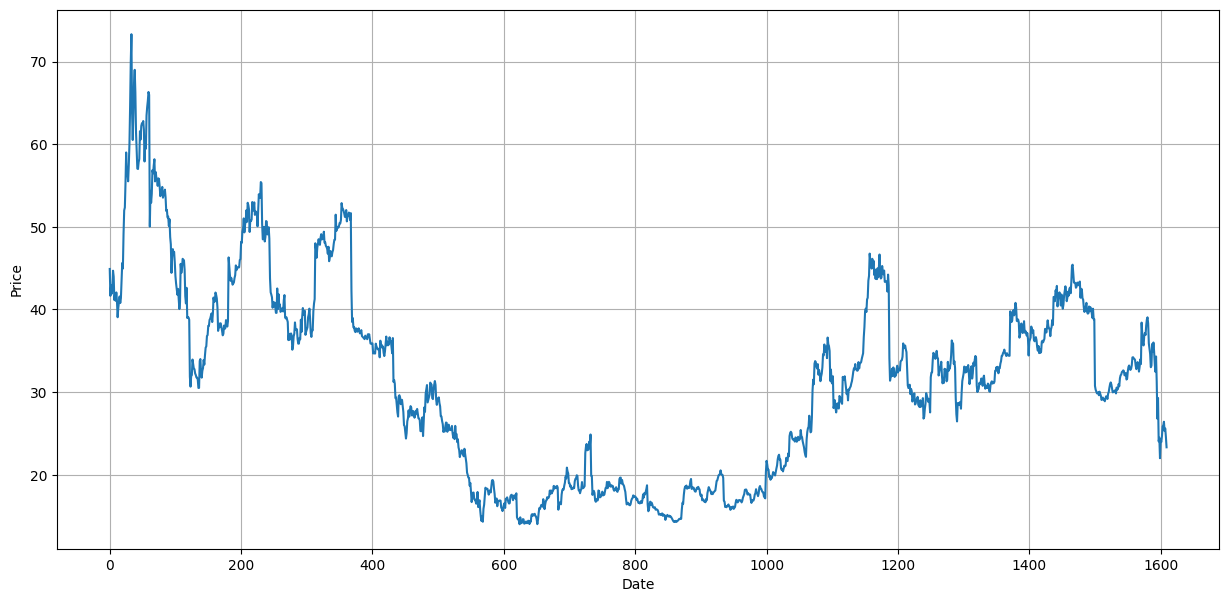

In [11]:
plt.figure(figsize=(15,7))
plt.plot(TWTR['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

In [12]:
print('First',TWTR.Close[0],'End', TWTR.Close[1609])
#Here we can see how the prices varied, intial vs closing

First 44.900001525878906 End 23.31999969482422


In [13]:
# We can also compute log returns as its time additive
log_returns=np.log(TWTR.Close/TWTR.Close.shift(1)).dropna()
#we also dropped the nans
log_returns

1      -0.075136
2       0.029570
3      -0.023586
4       0.016568
5       0.047896
          ...   
1605    0.016801
1606   -0.043334
1607    0.011793
1608   -0.041083
1609   -0.051808
Name: Close, Length: 1609, dtype: float64

In [14]:
log_returns.mean()

-0.0004071637540934105

In [15]:
TWTR.Close[0]*(np.exp(log_returns.mean()*len(log_returns)))

23.319999694824194

In [16]:
# Lets try to calculate the same using simple returns and see how it compares
simple_returns=TWTR.Close.pct_change().dropna()
# we also dropped the NaNs using dropna()
simple_returns

1      -0.072383
2       0.030012
3      -0.023310
4       0.016706
5       0.049061
          ...   
1605    0.016943
1606   -0.042408
1607    0.011862
1608   -0.040250
1609   -0.050489
Name: Close, Length: 1609, dtype: float64

In [17]:
simple_returns.mean()

0.00018807237208259812

In [18]:
TWTR.Close[0]*(np.prod([(1+Rt) for Rt in simple_returns]))

23.319999694824116

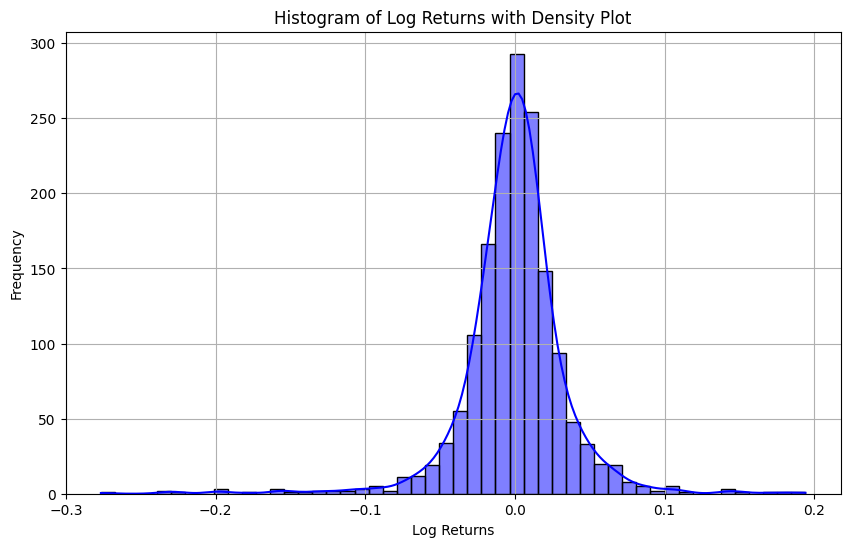

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(log_returns, bins=50, kde=True, color='blue')
plt.title('Histogram of Log Returns with Density Plot')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
# lets take the best and the worst case and see the std deviation and the probability of occurances if its assumed to be normal
log_returns_sorted=log_returns.tolist()
log_returns_sorted.sort()
# Here we sorted all the log returns according to their value,
# to get the lowest and the highest case (the leftmost and the Rightmost case in the Histogram)

worst=log_returns_sorted[0]
best=log_returns_sorted[-1]

std_worst=(worst-log_returns.mean())/log_returns.std()
std_best=(best-log_returns.mean())/log_returns.std()
# here we normalise it

print('Std dev. worst %.2f best %.2f' %(std_worst,std_best))

Std dev. worst -7.95 best 5.60


Q-Q PLOT


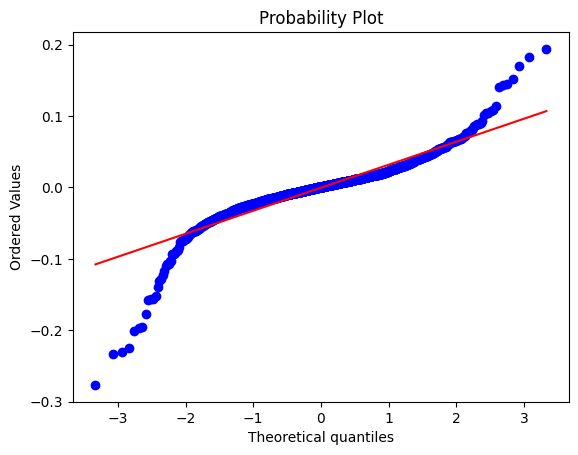

In [21]:
stats.probplot(log_returns, dist='norm', plot=pylab)
print('Q-Q PLOT')

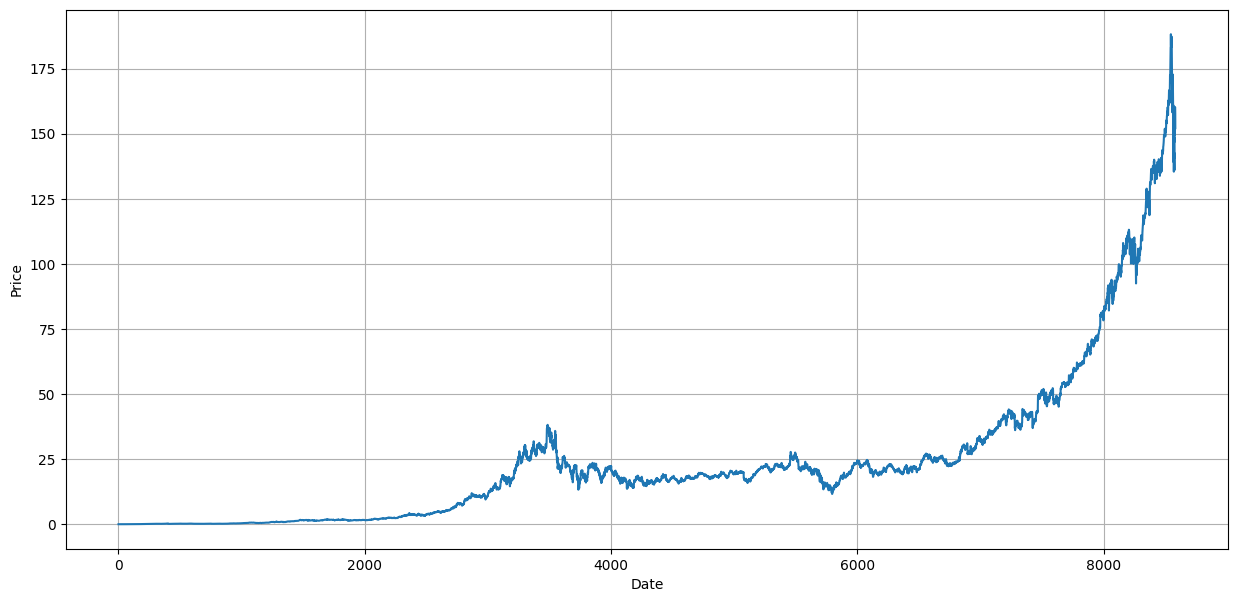

In [22]:
plt.figure(figsize=(15, 7))
plt.plot(MSFT['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

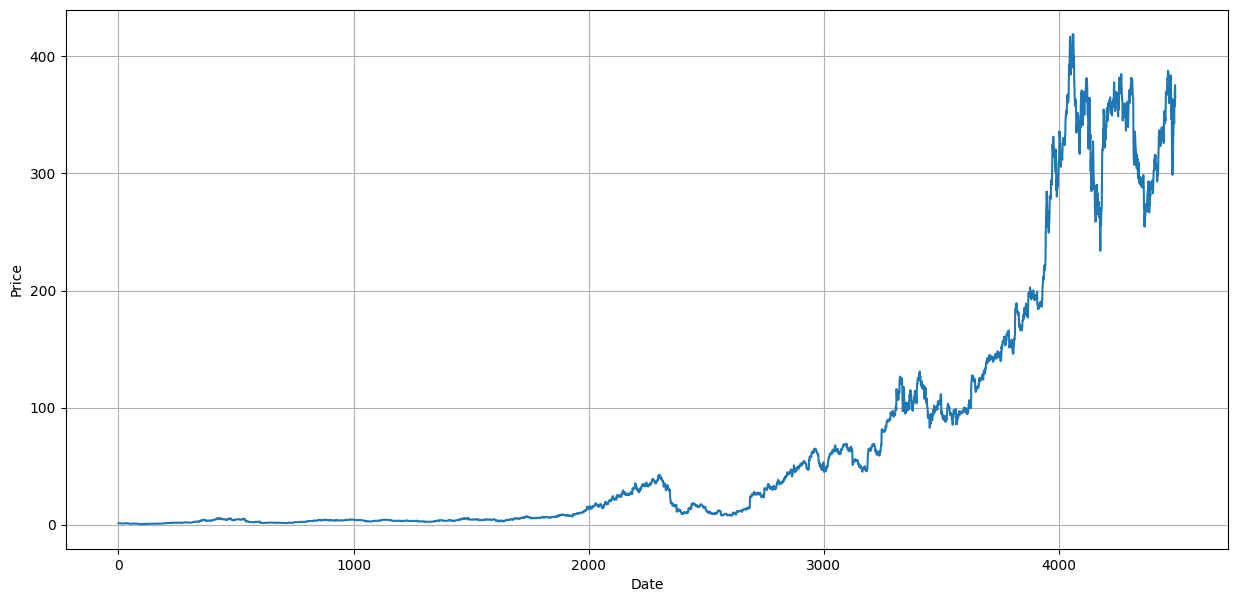

In [23]:
plt.figure(figsize=(15, 7))
plt.plot(NFLX['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

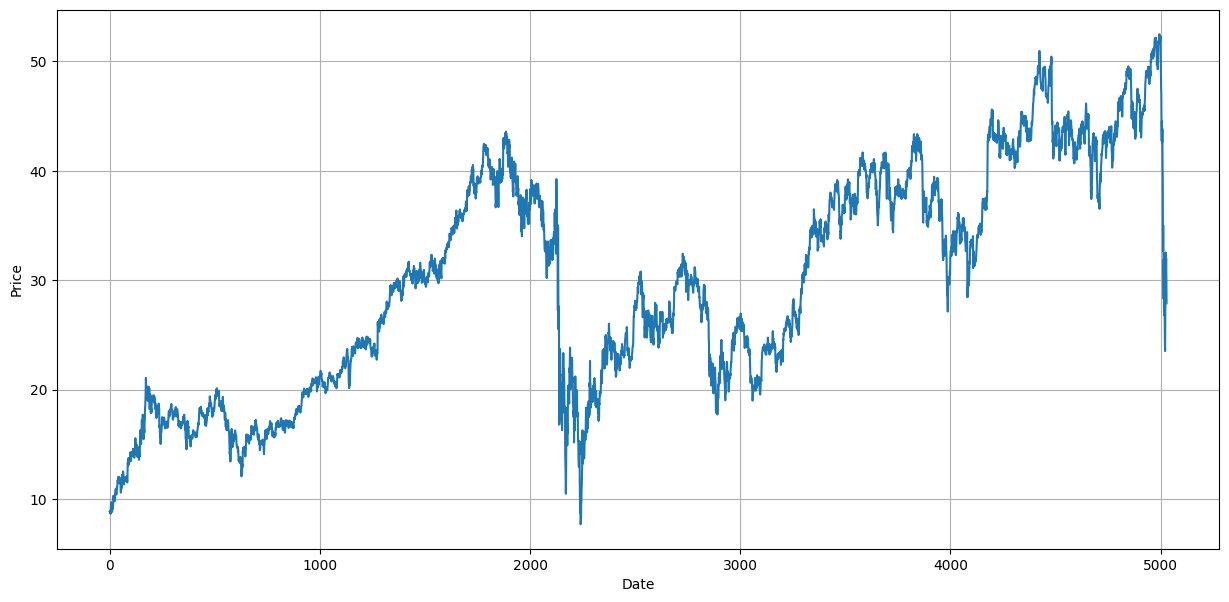

In [24]:

plt.figure(figsize=(15, 7))
plt.plot(MET['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

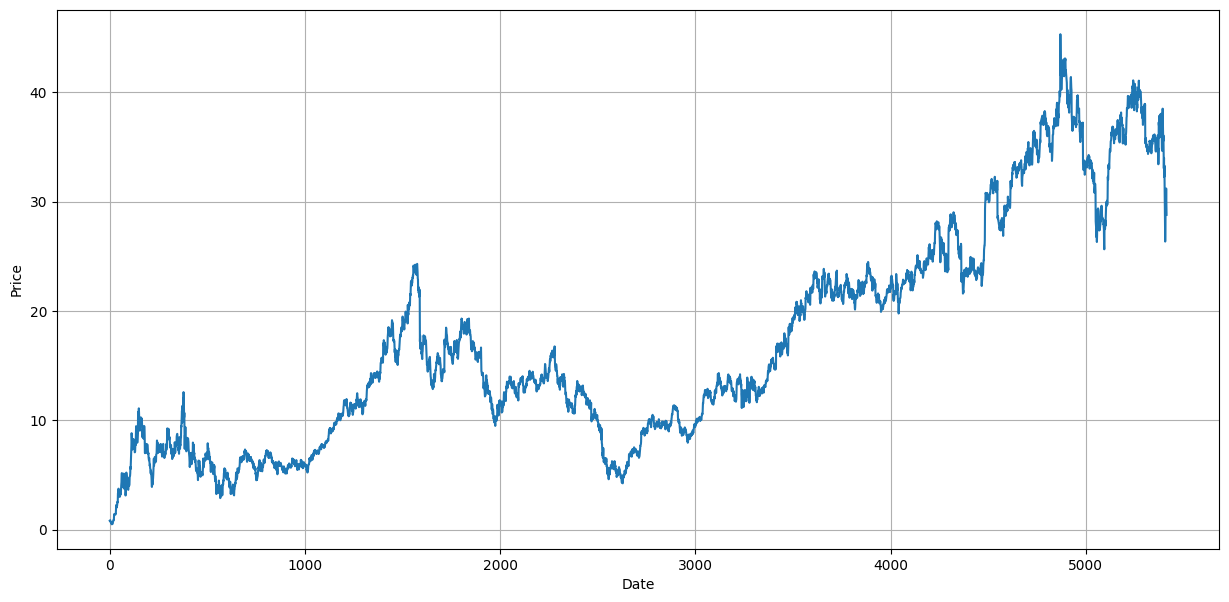

In [25]:
plt.figure(figsize=(15, 7))
plt.plot(EBAY['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

In [26]:
#Number of days for which moving average will be calculated
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA: {}".format(ma)
    TWTR[ma_str] = TWTR['Adj Close'].rolling(ma).mean()
    MET[ma_str] = MET['Adj Close'].rolling(ma).mean()
    MSFT[ma_str] = MSFT['Adj Close'].rolling(ma).mean()
    AMZN[ma_str] = AMZN['Adj Close'].rolling(ma).mean()
    NFLX[ma_str] = NFLX['Adj Close'].rolling(ma).mean()
    EBAY[ma_str] = EBAY['Adj Close'].rolling(ma).mean()

In [27]:
def plot_graphic(company, company_string):
    plt.figure(figsize=(15, 6))
    plt.plot(company['Adj Close'])
    plt.plot(company['MA: 10'])
    plt.plot(company['MA: 20'])
    plt.plot(company['MA: 30'])

    plt.title(company_string)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('Adjusted Close','MA: 10', 'MA: 20', 'MA:30'))
    plt.grid()
    plt.show()

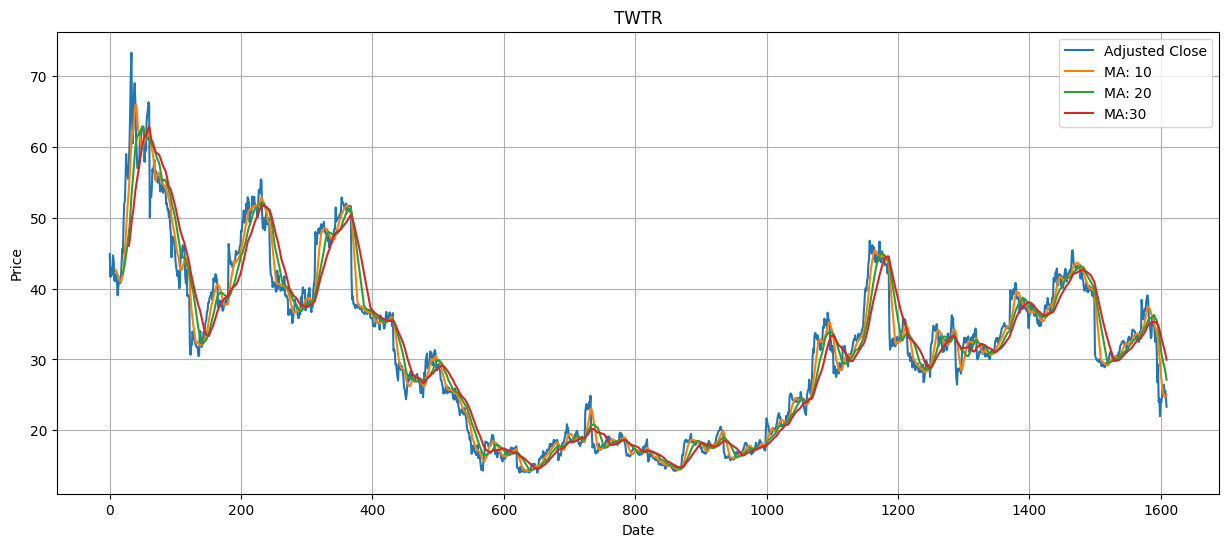

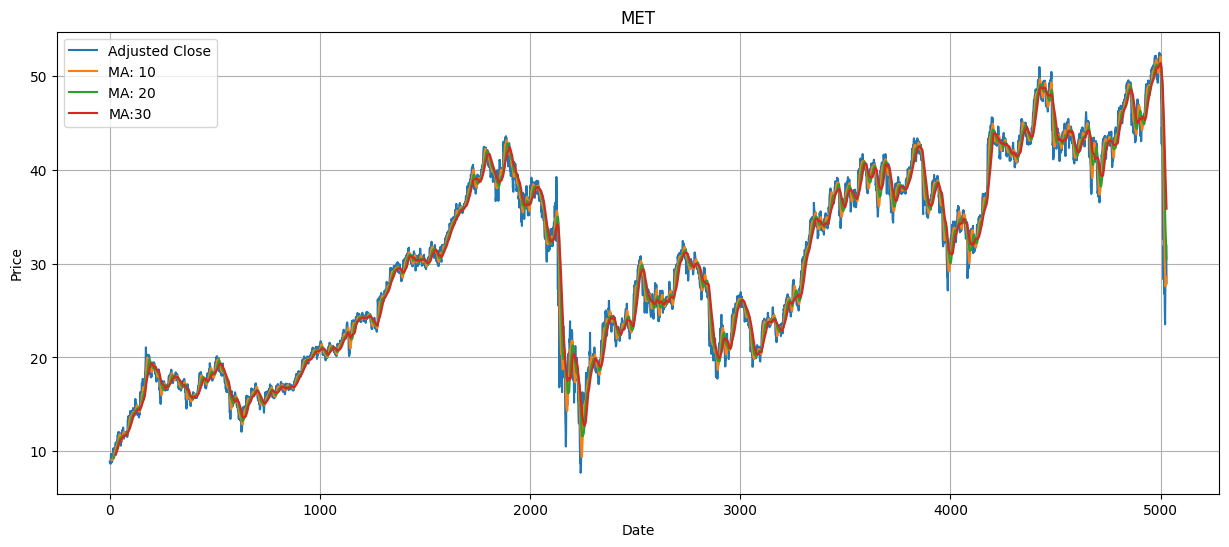

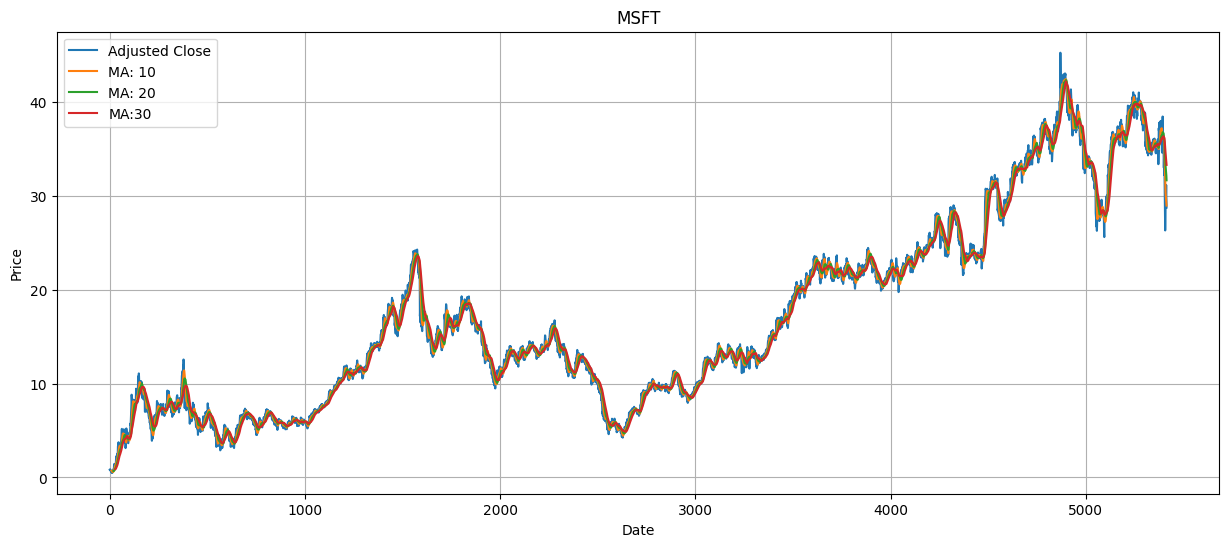

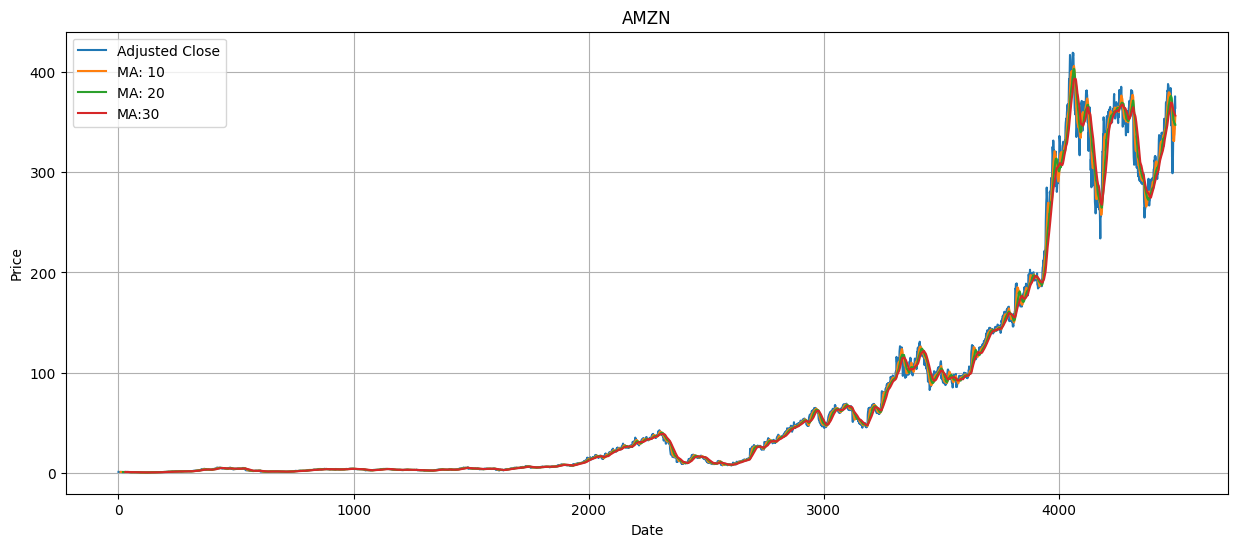

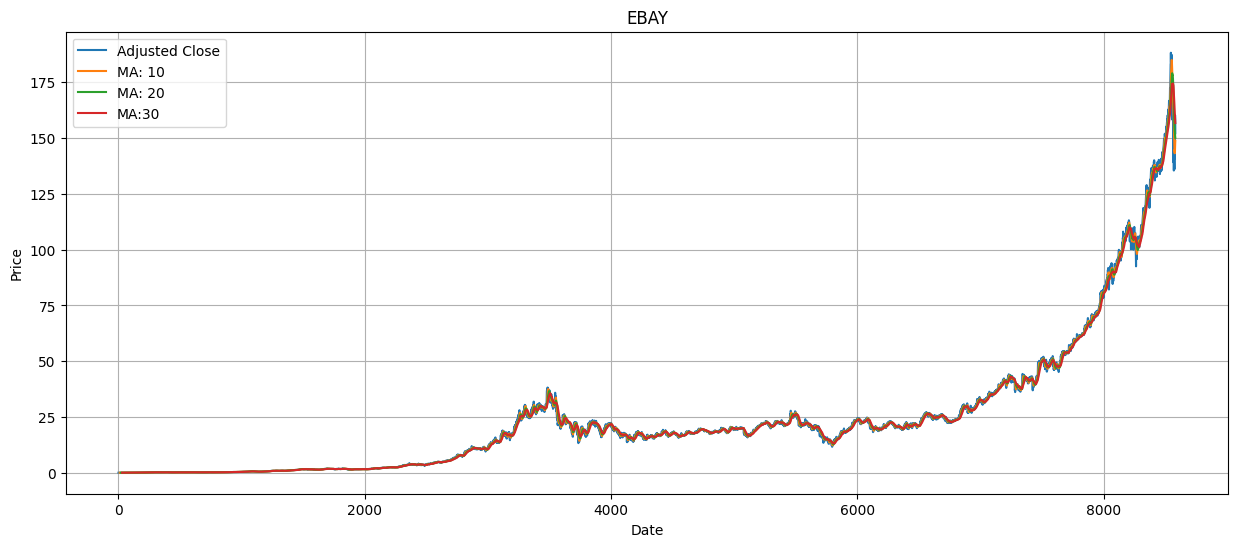

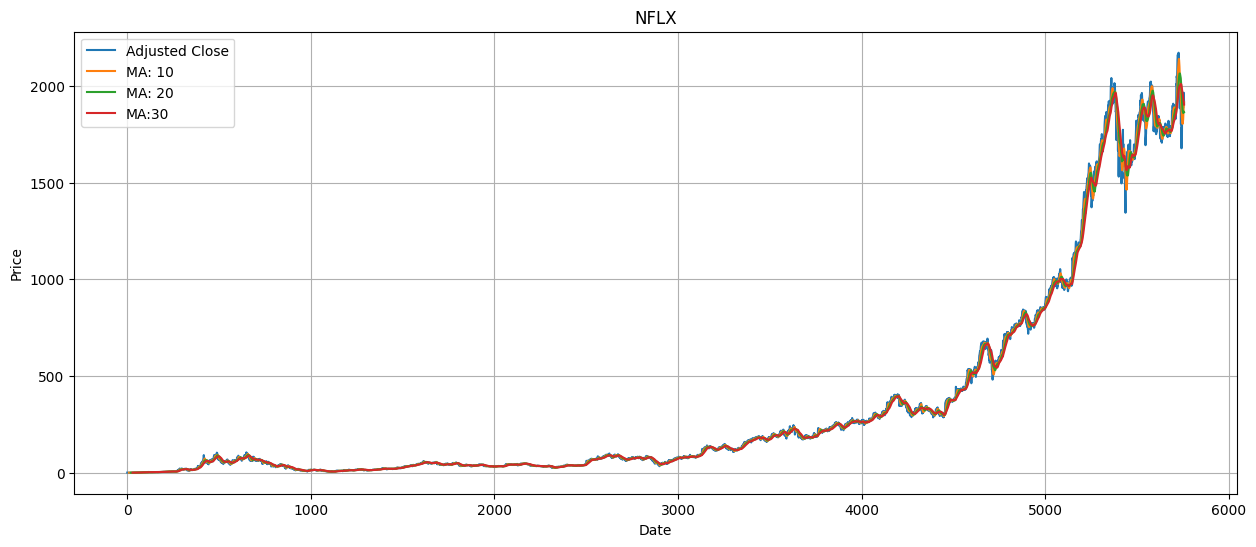

In [28]:
data_list = [ TWTR,MET, EBAY,NFLX, MSFT, AMZN]

for i in range(len(data_list)):
    plot_graphic(data_list[i], company_list[i])

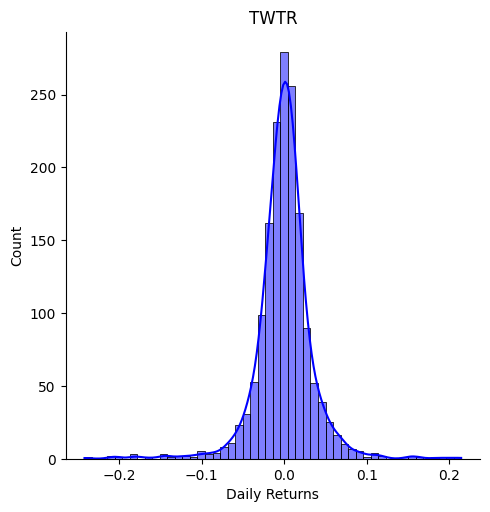

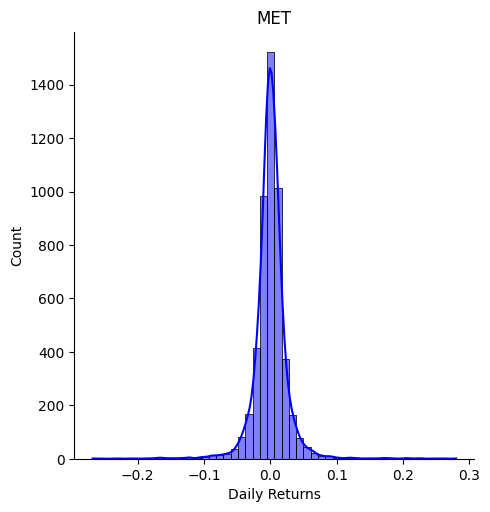

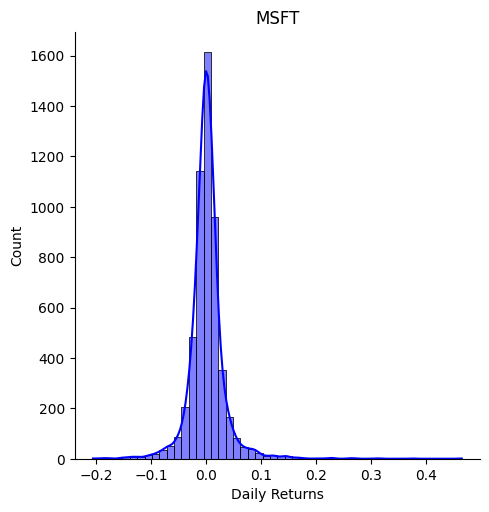

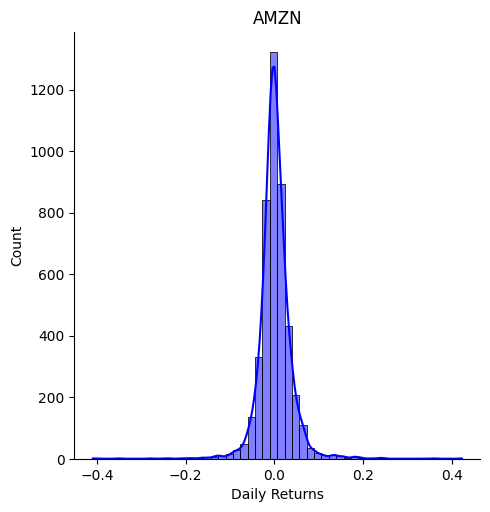

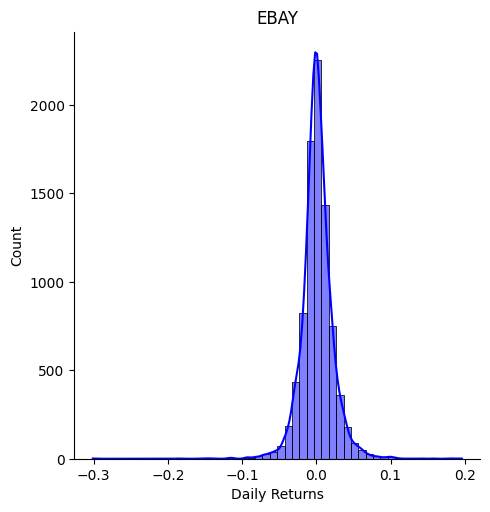

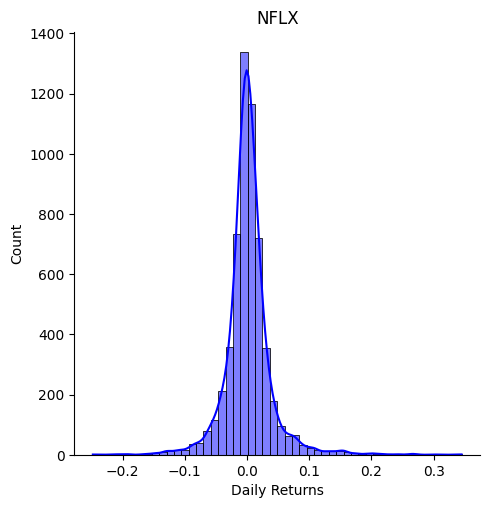

In [29]:
# Calculate returns and draw distribution

for i in range(len(data_list)):
    data_list[i]['Daily Returns'] = data_list[i]['Adj Close'].pct_change()
    sns.displot(data_list[i]['Daily Returns'].dropna(), bins=50, color='blue', kde=True)
    plt.title(company_list[i])
    plt.show()

In [30]:

# Assuming data_list is a list of dictionaries with 'Daily Returns' as a key and the values are pandas Series
daily_returns_list = [data['Daily Returns'] for data in data_list]

# Concatenate the daily return series along the columns axis
stock_returns = pd.concat(daily_returns_list, axis=1)

# Set the columns names to match the company_list
stock_returns.columns = company_list

# Display the first few rows of the resulting DataFrame
stock_returns.head()

TWTR       MET      MSFT      AMZN      EBAY      NFLX
0       NaN       NaN       NaN       NaN       NaN       NaN
1 -0.072383  0.004032 -0.052770  0.011343  0.035715 -0.117021
2  0.030012 -0.016064  0.075209 -0.043684  0.017241 -0.012048
3 -0.023310  0.008163  0.012953 -0.046296 -0.025424 -0.042683
4  0.016706 -0.020243 -0.078005 -0.029126 -0.017391 -0.127388

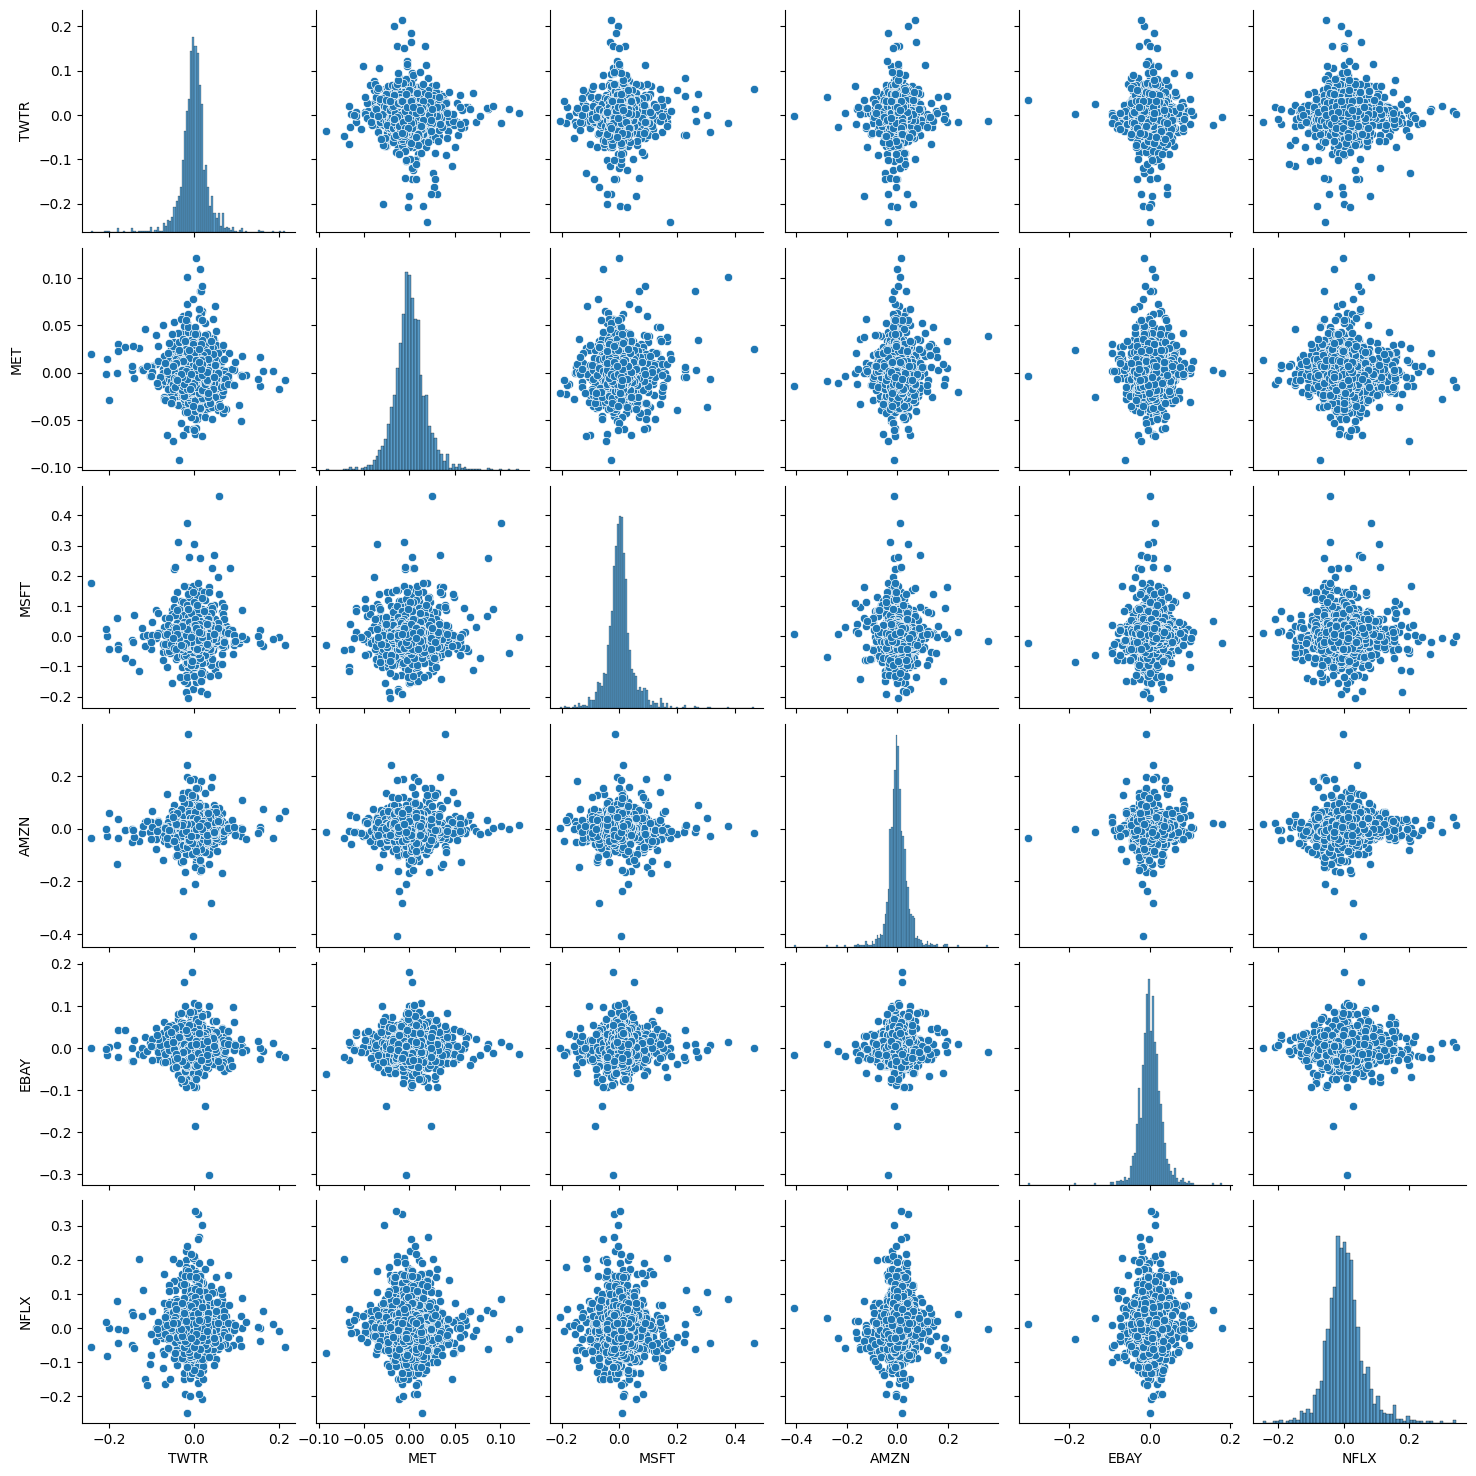

In [31]:
sns.pairplot(stock_returns.dropna())

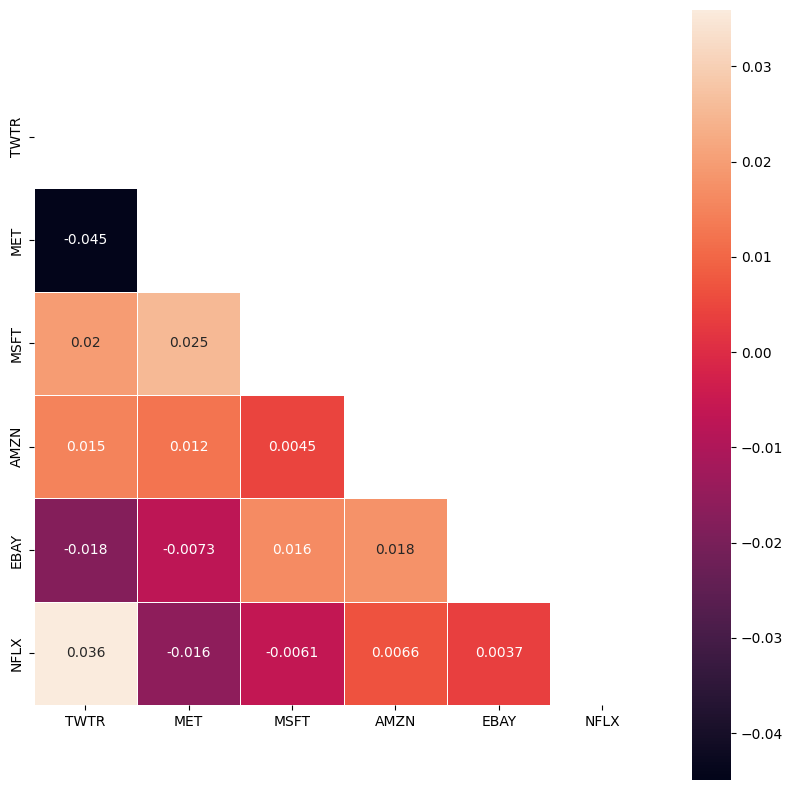

In [32]:
# Build correlation matrix
corr = stock_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

In [33]:
mean_income = stock_returns.mean() # Mean income for each stock
cov_returns = stock_returns.cov() # Covariation
count = len(stock_returns.columns)
print(mean_income, cov_returns, sep='\n')

TWTR    0.000188
MET     0.000567
MSFT    0.001192
AMZN    0.001942
EBAY    0.001142
NFLX    0.001880
dtype: float64
          TWTR       MET      MSFT      AMZN      EBAY      NFLX
TWTR  0.001169 -0.000029  0.000035  0.000021 -0.000017  0.000072
MET  -0.000029  0.000679  0.000022  0.000012 -0.000005 -0.000016
MSFT  0.000035  0.000022  0.001099  0.000006  0.000013 -0.000008
AMZN  0.000021  0.000012  0.000006  0.001333  0.000016  0.000010
EBAY -0.000017 -0.000005  0.000013  0.000016  0.000464  0.000003
NFLX  0.000072 -0.000016 -0.000008  0.000010  0.000003  0.001397


In [34]:
# Function, that generate random shares
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share

In [35]:
def IncomePortfolio(Rand):
    return np.matmul(mean_income.values, Rand)


def RiskPortfolio(Rand):
    return np.sqrt(np.matmul(np.matmul(Rand, cov_returns.values), Rand))

In [36]:
combinations = 10000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, count))

# Function, which create new combinations of shares
for i in range(combinations):
    rand = randomPortfolio()

    portfolio[i, :] = rand
    risk[i] = RiskPortfolio(rand)
    income[i] = IncomePortfolio(rand)

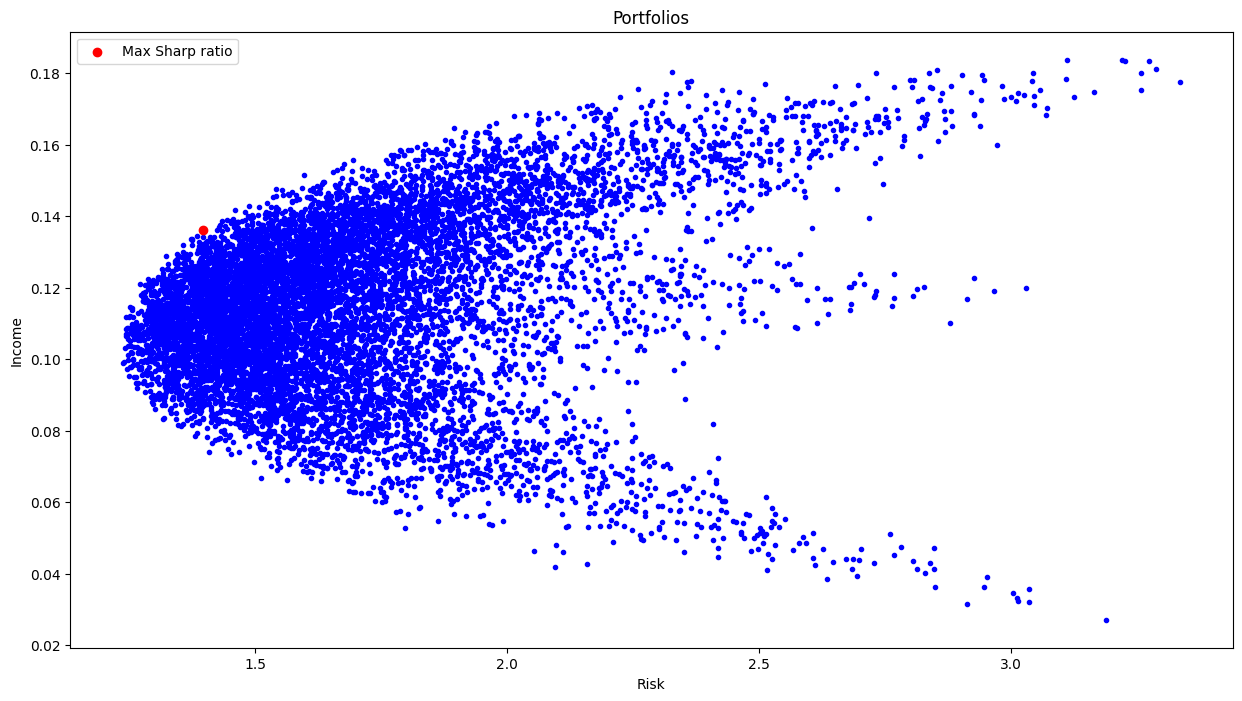

In [37]:
plt.figure(figsize=(15, 8))

plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")

plt.legend()
plt.show()

In [38]:
best_port = portfolio[MaxSharpRatio]
for i in range(len(company_list)):
    print("{} : {}".format(company_list[i], best_port[i]))

TWTR : 0.023339433767136708
MET : 0.12098681147746344
MSFT : 0.11729671667061531
AMZN : 0.17272877607287437
EBAY : 0.34052992734112847
NFLX : 0.22511833467078168


In [39]:
days = 365
dt = 1 / days
# here I have divided by 365 but usually we do by 252 (the number of trading days)
stock_returns.dropna(inplace=True)

mu = stock_returns.mean()
sigma = stock_returns.std()

In [40]:
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

Text(0.5, 1.0, 'Monte Carlo analysis for Twitter')

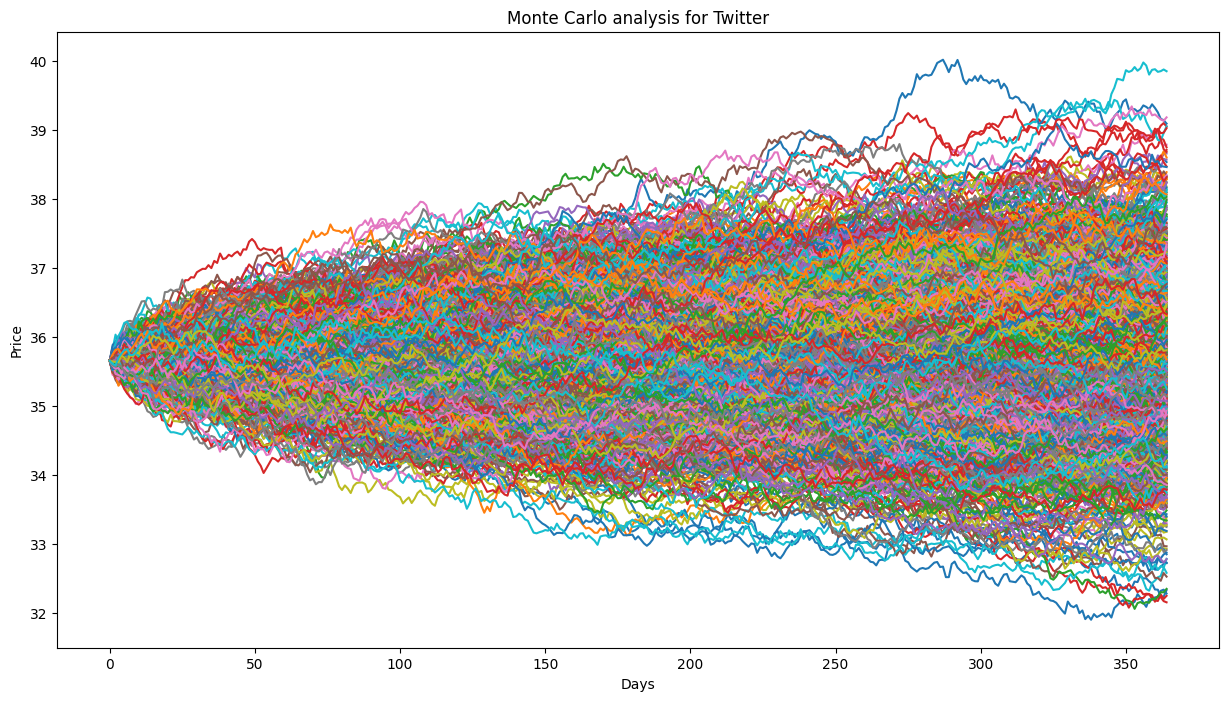

In [41]:
start_price = 35.65
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TWTR'], sigma['TWTR'])
    sim[i] = result[days - 1]
    plt.plot(result)

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Twitter')

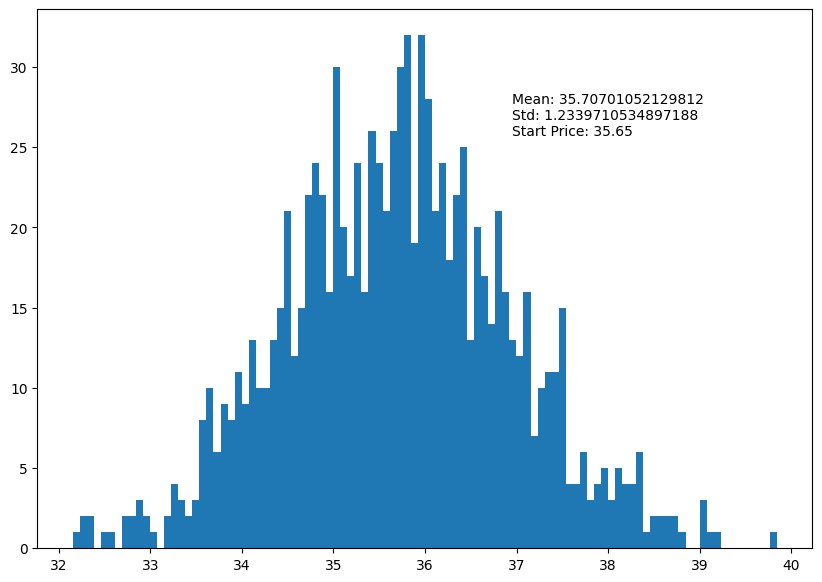

In [42]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Text(0.5, 1.0, 'Monte Carlo analysis for EBAY')

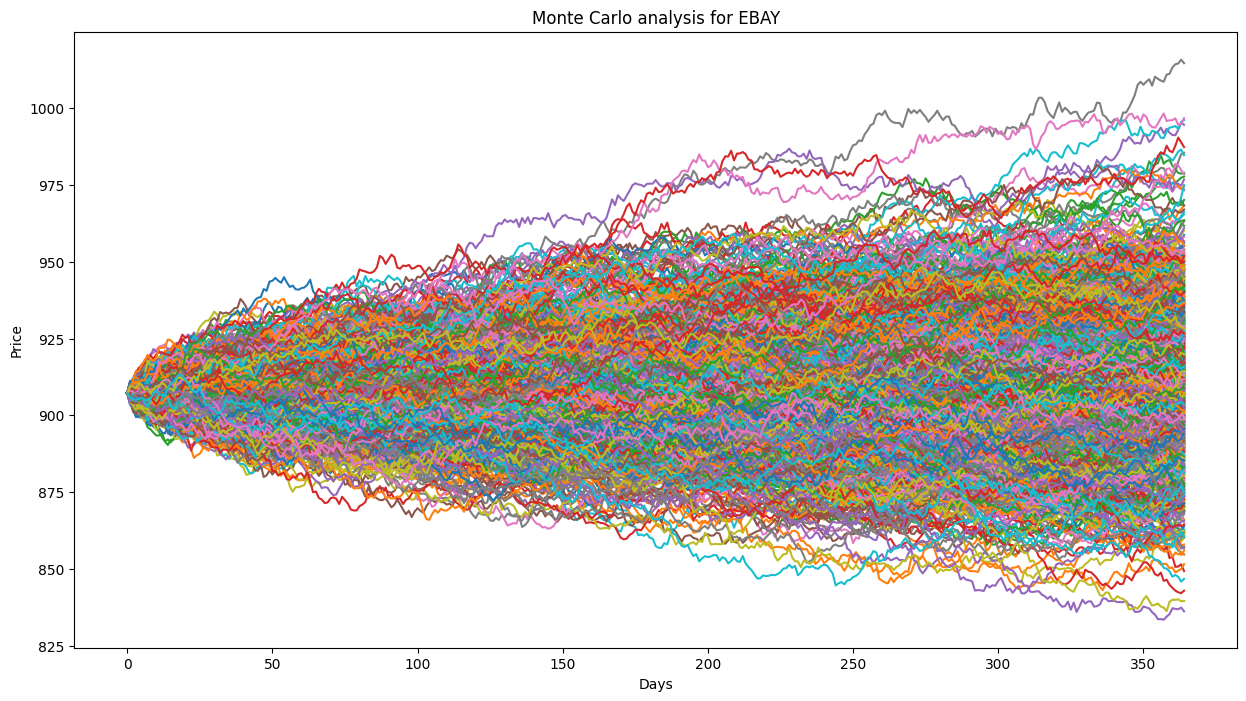

In [43]:
start_price = 907.34
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['EBAY'], sigma['EBAY'])
    sim[i] = result[days - 1]
    plt.plot(result)

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for EBAY')

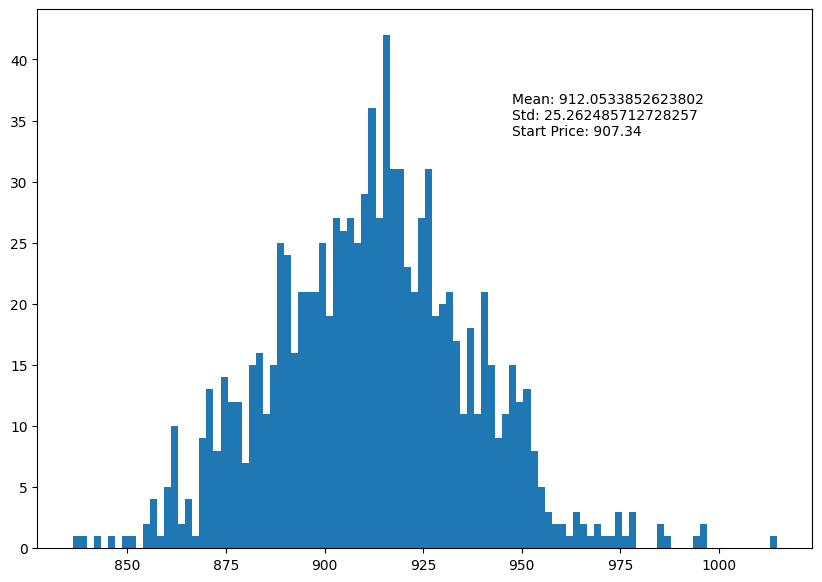

In [44]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Text(0.5, 1.0, 'Monte Carlo analysis for Microsoft')

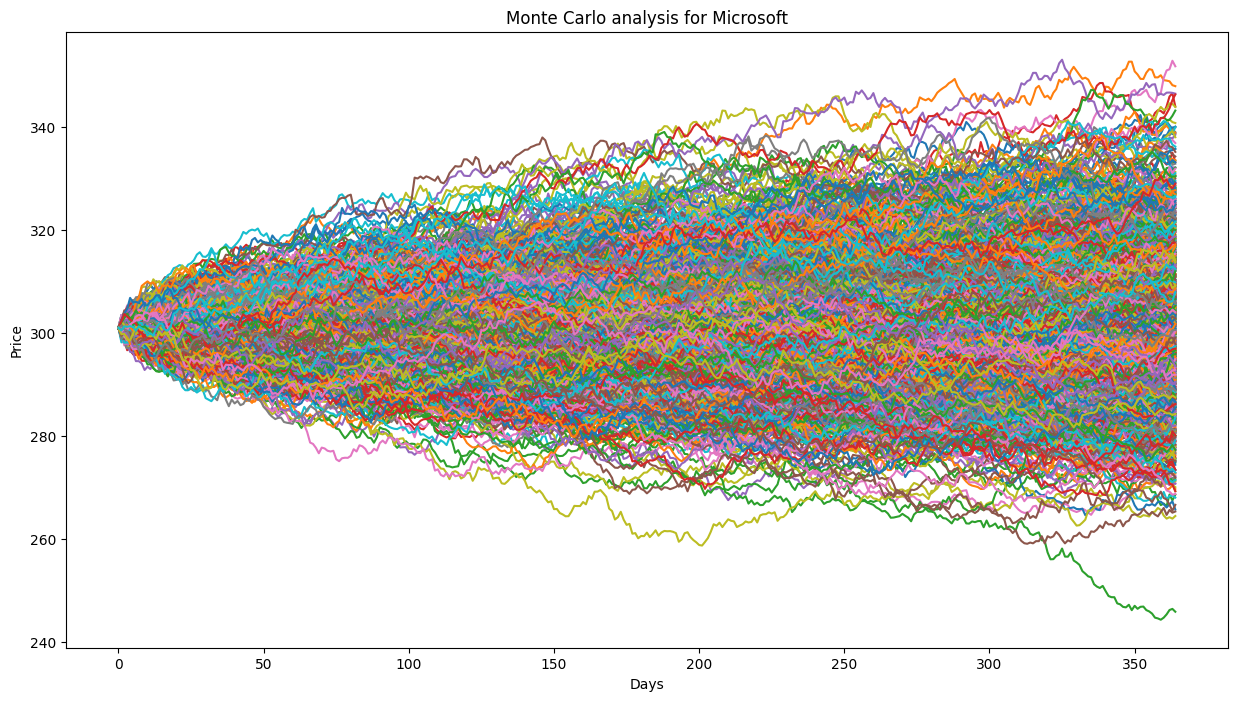

In [45]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['MSFT'], sigma['MSFT'])
    sim[i] = result[days - 1]
    plt.plot(result)

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Microsoft')

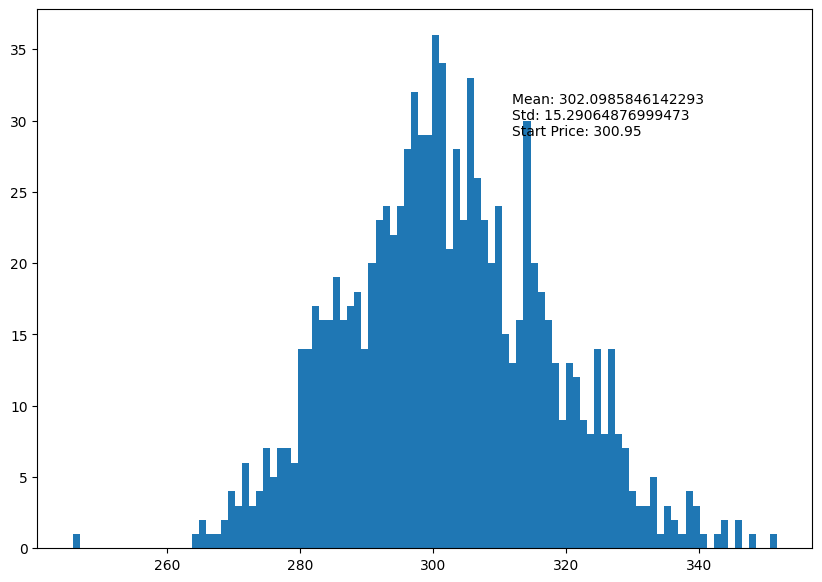

In [46]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Text(0.5, 1.0, 'Monte Carlo analysis for Amazon')

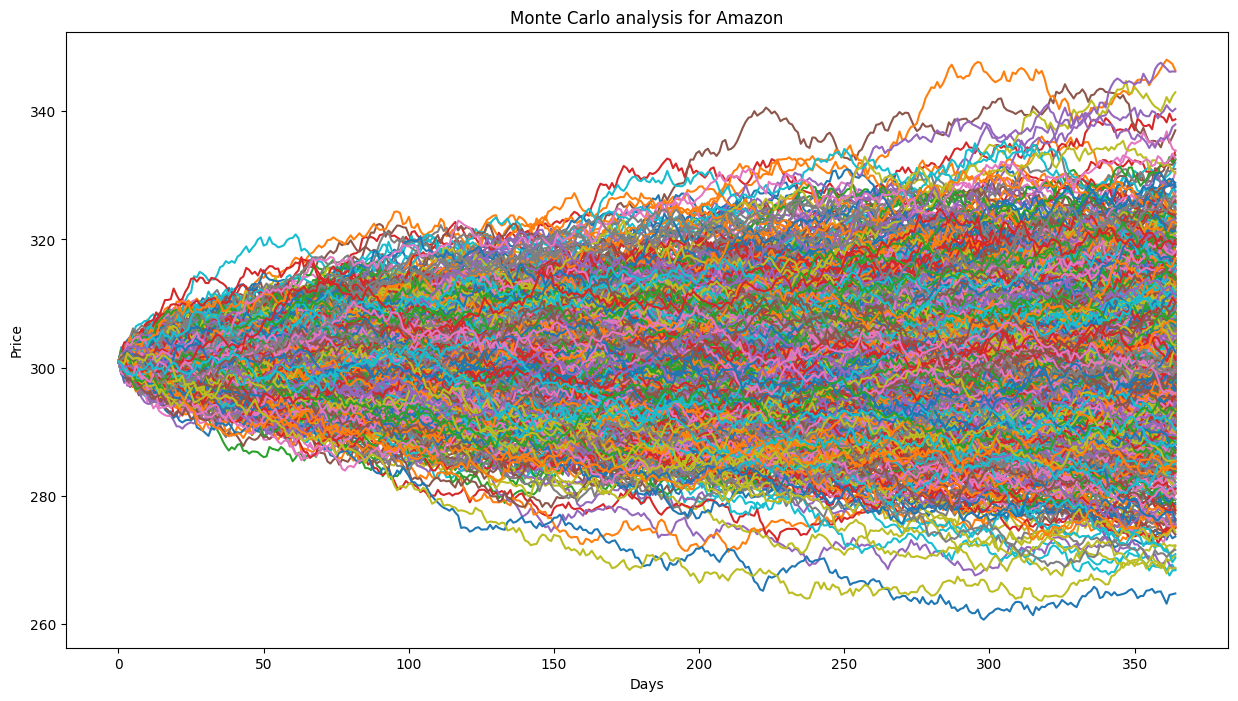

In [47]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['AMZN'], sigma['AMZN'])
    sim[i] = result[days - 1]
    plt.plot(result)

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Amazon')

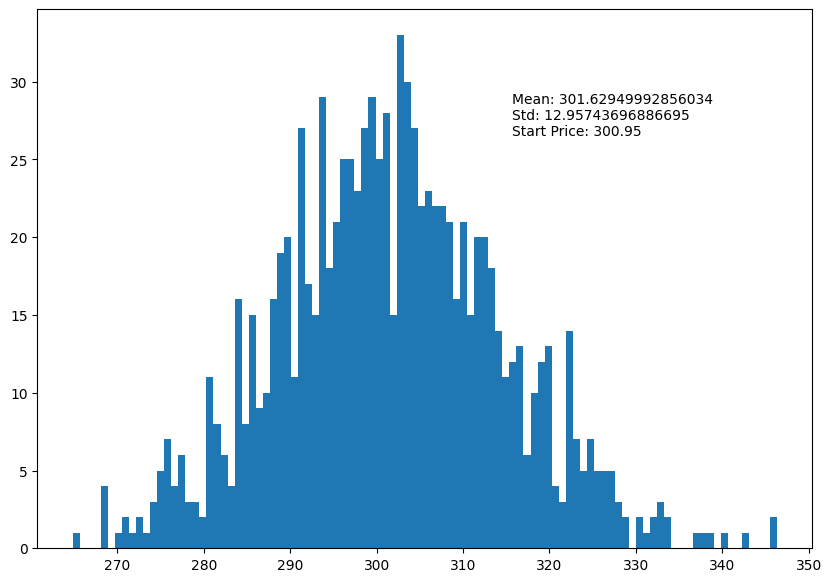

In [48]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

In [49]:
# lets import more data
df = yf.download(['AAPL', 'NKE', 'GOOGL', 'AMZN'], start='2015-01-01', end='2019-12-31')
df.head()

[*********************100%***********************]  4 of 4 completed


Price                      Adj Close                                 \
Ticker                          AAPL     AMZN      GOOGL        NKE   
Date                                                                  
2015-01-02 00:00:00+00:00  24.373962  15.4260  26.412100  42.569782   
2015-01-05 00:00:00+00:00  23.687305  15.1095  25.908844  41.884403   
2015-01-06 00:00:00+00:00  23.689529  14.7645  25.269430  41.638027   
2015-01-07 00:00:00+00:00  24.021713  14.9210  25.195114  42.498112   
2015-01-08 00:00:00+00:00  24.944685  15.0230  25.282896  43.479145   

Price                          Close                                 \
Ticker                          AAPL     AMZN      GOOGL        NKE   
Date                                                                  
2015-01-02 00:00:00+00:00  27.332500  15.4260  26.477501  47.514999   
2015-01-05 00:00:00+00:00  26.562500  15.1095  25.973000  46.750000   
2015-01-06 00:00:00+00:00  26.565001  14.7645  25.332001  46.474998   
2015-01-07 00:00:00+00:00  26.937500  14.9210  25.257500  47.435001   
2015-01-08 00:00:00+00:00  27.972500  15.0230  25.345501  48.529999   

Price                           High           ...        Low             \
Ticker                          AAPL     AMZN  ...      GOOGL        NKE   
Date                                           ...                         
2015-01-02 00:00:00+00:00  27.860001  15.7375  ...  26.393999  47.055000   
2015-01-05 00:00:00+00:00  27.162500  15.4190  ...  25.887501  46.564999   
2015-01-06 00:00:00+00:00  26.857500  15.1500  ...  25.277500  46.035000   
2015-01-07 00:00:00+00:00  27.049999  15.0640  ...  25.182501  46.549999   
2015-01-08 00:00:00+00:00  28.037500  15.1570  ...  24.750999  47.810001   

Price                           Open                                 \
Ticker                          AAPL     AMZN      GOOGL        NKE   
Date                                                                  
2015-01-02 00:00:00+00:00  27.847500  15.6290  26.629999  48.275002   
2015-01-05 00:00:00+00:00  27.072500  15.3505  26.357500  47.255001   
2015-01-06 00:00:00+00:00  26.635000  15.1120  26.025000  46.945000   
2015-01-07 00:00:00+00:00  26.799999  14.8750  25.547501  46.805000   
2015-01-08 00:00:00+00:00  27.307501  15.0160  25.075500  47.830002   

Price                         Volume                               
Ticker                          AAPL      AMZN     GOOGL      NKE  
Date                                                               
2015-01-02 00:00:00+00:00  212818400  55664000  26480000  4985800  
2015-01-05 00:00:00+00:00  257142000  55484000  41182000  6889200  
2015-01-06 00:00:00+00:00  263188400  70380000  54456000  7576000  
2015-01-07 00:00:00+00:00  160423600  52806000  46918000  7256000  
2015-01-08 00:00:00+00:00  237458000  61768000  73054000  5978200  

[5 rows x 24 columns]

In [50]:
# Closing price
df = df['Adj Close']
df.head()

Ticker                          AAPL     AMZN      GOOGL        NKE
Date                                                               
2015-01-02 00:00:00+00:00  24.373962  15.4260  26.412100  42.569782
2015-01-05 00:00:00+00:00  23.687305  15.1095  25.908844  41.884403
2015-01-06 00:00:00+00:00  23.689529  14.7645  25.269430  41.638027
2015-01-07 00:00:00+00:00  24.021713  14.9210  25.195114  42.498112
2015-01-08 00:00:00+00:00  24.944685  15.0230  25.282896  43.479145

In [51]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker      AAPL      AMZN     GOOGL       NKE
Ticker                                        
AAPL    0.000246  0.000142  0.000122  0.000084
AMZN    0.000142  0.000334  0.000176  0.000092
GOOGL   0.000122  0.000176  0.000222  0.000085
NKE     0.000084  0.000092  0.000085  0.000219

In [52]:
# Yearly returns for individual companies
ind_er = df.resample('YE').last().pct_change().mean()
ind_er

Ticker
AAPL     0.357854
AMZN     0.295745
GOOGL    0.155478
NKE      0.160666
dtype: float64

In [53]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Ticker
AAPL     0.247871
AMZN     0.288770
GOOGL    0.235375
NKE      0.233916
dtype: float64

In [54]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

Returns  Volatility
Ticker                      
AAPL    0.357854    0.247871
AMZN    0.295745    0.288770
GOOGL   0.155478    0.235375
NKE     0.160666    0.233916

In [55]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [56]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [57]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [58]:
portfolios  = pd.DataFrame(data)
portfolios.head()

Returns  Volatility  AAPL weight  AMZN weight  GOOGL weight  NKE weight
0  0.229892    0.194084     0.165515     0.279001      0.211842    0.343641
1  0.230000    0.195688     0.258056     0.136915      0.008891    0.596138
2  0.255416    0.199162     0.285224     0.293678      0.223994    0.197104
3  0.240698    0.194153     0.320998     0.137485      0.353872    0.187646
4  0.239243    0.203382     0.117450     0.412557      0.059840    0.410154

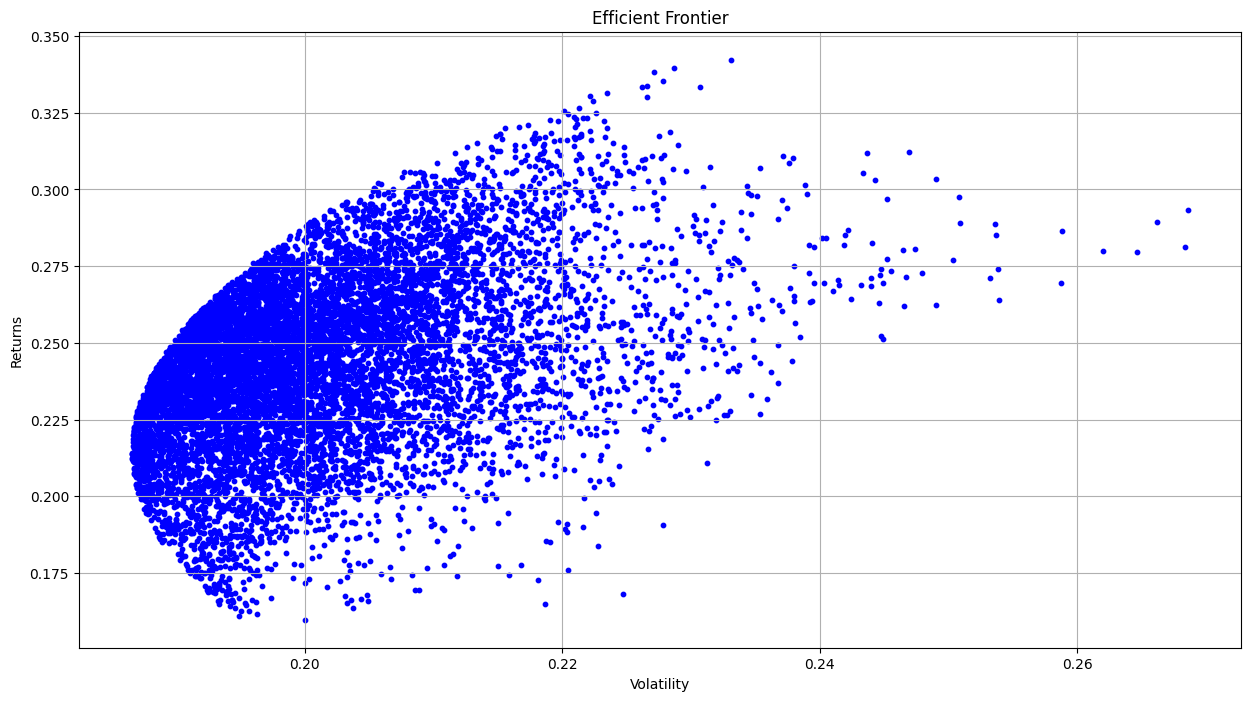

In [59]:
plt.figure(figsize=(15, 8))  # Reduced figure size
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c='blue', marker='o', s=10)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

In [60]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns         0.214116
Volatility      0.186575
AAPL weight     0.252891
AMZN weight     0.038122
GOOGL weight    0.301977
NKE weight      0.407010
Name: 8550, dtype: float64

/tmp/ipykernel_76952/1792874120.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



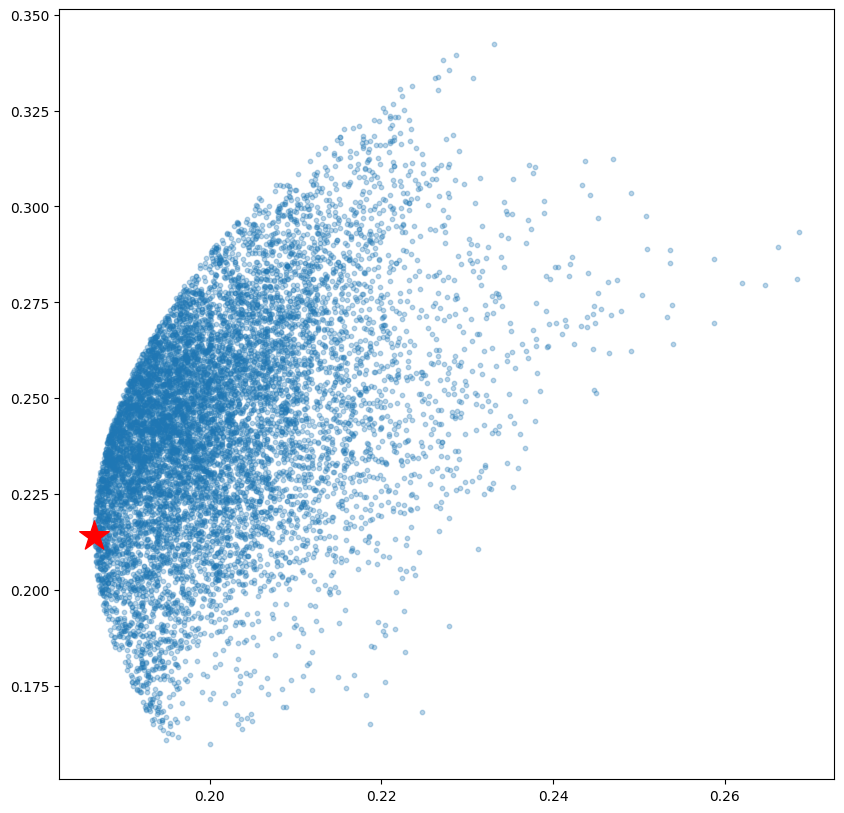

In [61]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [62]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.338148
Volatility      0.227165
AAPL weight     0.744570
AMZN weight     0.226992
GOOGL weight    0.000041
NKE weight      0.028396
Name: 1181, dtype: float64

/tmp/ipykernel_76952/1083254237.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_76952/1083254237.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



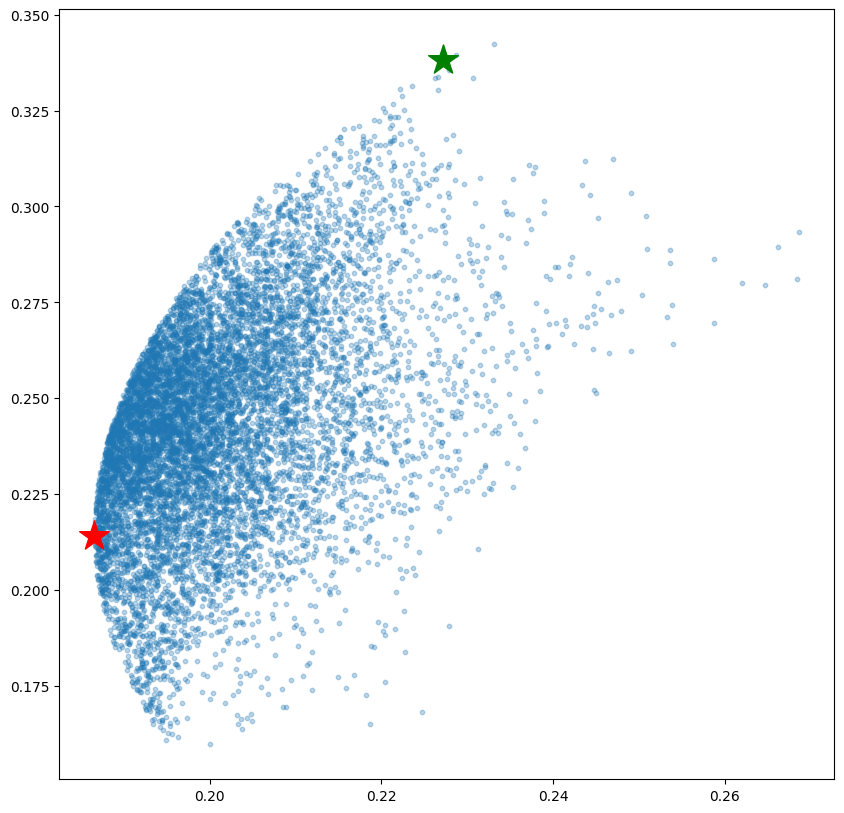

In [63]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)